In [1]:
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()
import tensorflow as tf
from IPython.display import Image

# READ DATASET - PROPERLY DECODED


In [2]:
#TINY IMAGENET 
#filenames_train = "/Users/roxanefischer/Desktop/essai/train/train-00998-of-01024"
#filenames_val = "/Users/roxanefischer/Desktop/essai/validation/validation-00000-of-00128"

#IMAGENET
filenames_train = "/Users/roxanefischer/Desktop/train-00000-of-01024"
filenames_val = "/Users/roxanefischer/Desktop/validation-00000-of-00128"
raw_dataset_train = tf.data.TFRecordDataset(filenames_train)
raw_dataset_val = tf.data.TFRecordDataset(filenames_val)

cifar = "/Users/roxanefischer/Desktop/cifar/validation-00000-of-00128"
cif  = tf.data.TFRecordDataset(cifar)


In [3]:
#Images which  are going to be displayed
raw_image_dataset=raw_dataset_train


'\\037\\213\\010\\000\\000\\000\\000\\000\\000\\003\\225WUP\\034'

'\\037\\213\\010\\000\\000\\000\\000\\000\\000\\003\\225WUP\\034'

In [4]:

for raw_record in raw_image_dataset.take(3):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  #print("---------------------------------------")
  #print(dir(example))
  #print(example.features.feature["image/class/label"])
  #print(example.features.feature["image/filename"])
  print(example.features.feature["image/class/synset"])
  #print(example)


bytes_list {
  value: "n02791270"
}

bytes_list {
  value: "n02510455"
}

bytes_list {
  value: "n07734744"
}



In [5]:
#\\037\\213\\010\\000\\000\\000\\000\\000\\000\\003\\225WUP\\034'

%pycache
for raw_record in raw_dataset_train.take(1):
  example = tf.train.Example()
  example.ParseFromString(raw_record.numpy())
  print(example)


In [6]:
# Create a dictionary describing the features.
image_feature_description = {
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/class/label': tf.io.FixedLenFeature([], tf.int64),
    'image/class/synset': tf.io.FixedLenFeature([], tf.string),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_image_dataset.map(_parse_image_function)
parsed_image_val = raw_dataset_val.map(_parse_image_function)


In [7]:
label_chosen =0

In [8]:
label_chosen +=1

# Val

813
tf.Tensor(b'n09428293', shape=(), dtype=string)


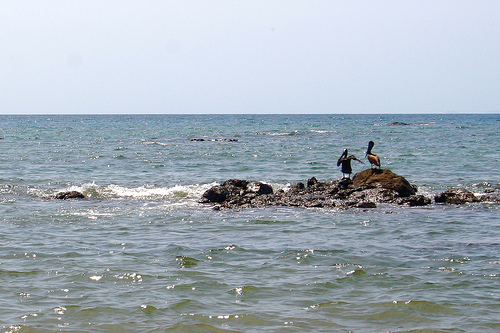

283
tf.Tensor(b'n02871525', shape=(), dtype=string)


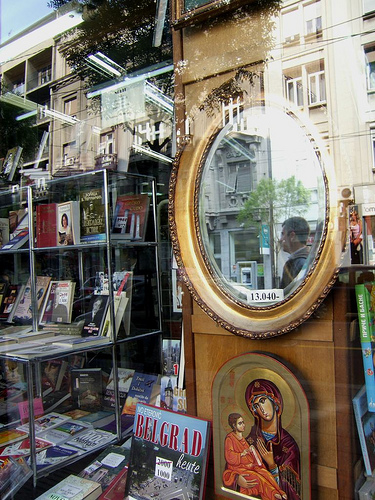

130
tf.Tensor(b'n02119789', shape=(), dtype=string)


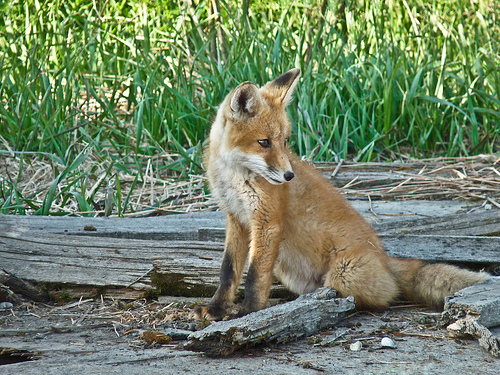

612
tf.Tensor(b'n04141975', shape=(), dtype=string)


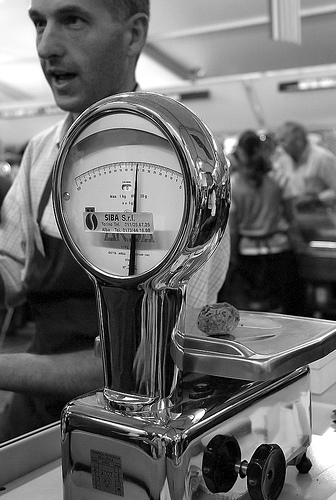

329
tf.Tensor(b'n03000247', shape=(), dtype=string)


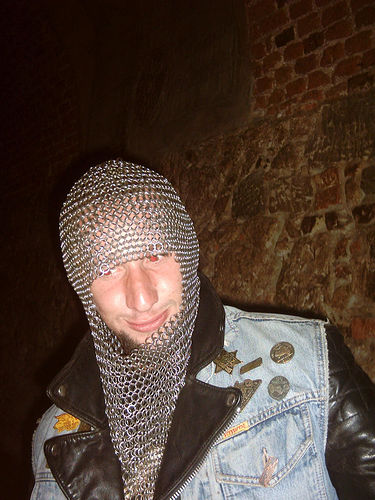

In [10]:
c=0
for image_features in parsed_image_val:
  image_raw = image_features['image/encoded'].numpy()
  label = int(image_features['image/class/label'])
  #print(label)
  #if label == label_chosen :
  if c <5:
    c=c+1
    print(label)
    print(image_features['image/class/synset'])
    display(Image(data=image_raw))


# Train

tf.Tensor(b'n02871525', shape=(), dtype=string)


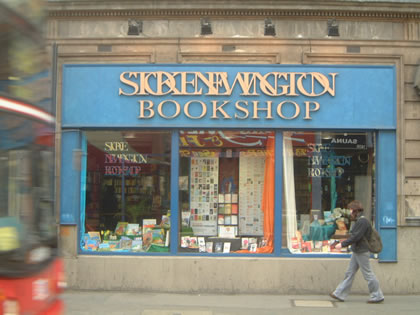

tf.Tensor(b'n02871525', shape=(), dtype=string)


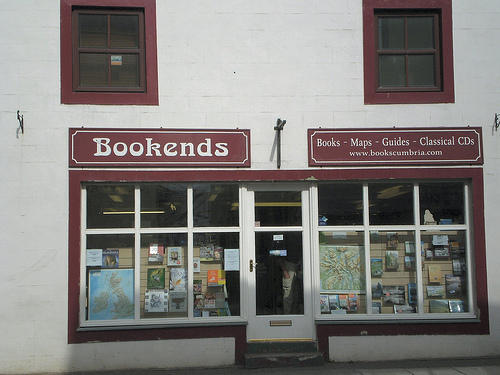

In [12]:

for image_features in parsed_image_dataset:
  image_raw = image_features['image/encoded'].numpy()
  label = int(image_features['image/class/label'])
  #print(label)
  if label == 283 :
    print(image_features['image/class/synset'])
    display(Image(data=image_raw))


## Test Imagenet Input

In [8]:
filename = "/Users/roxanefischer/Documents/cours/3A/Stage_ML/single-path-nas/tiny-imagenet-200/test/images/test_0.JPEG"
data_dir = "/Users/roxanefischer/Documents/cours/3A/Stage_ML/single-path-nas/imagenet_3"
is_training = True

# Imagenet to gcs

In [9]:
#from imagenet_to_gcs import *
class ImageCoder(object):
  """Helper class that provides TensorFlow image coding utilities."""

  def __init__(self):
    # Create a single Session to run all image coding calls.
    self._sess = tf.Session()
    #self._sess = tf_debug.LocalCLIDebugWrapperSession(tf.Session())
    # Initializes function that converts PNG to JPEG data.
    self._png_data = tf.placeholder(dtype=tf.string)
    image = tf.image.decode_png(self._png_data, channels=3)
    self._png_to_jpeg = tf.image.encode_jpeg(image, format='rgb', quality=100)

    # Initializes function that converts CMYK JPEG data to RGB JPEG data.
    self._cmyk_data = tf.placeholder(dtype=tf.string)
    image = tf.image.decode_jpeg(self._cmyk_data, channels=0)
    self._cmyk_to_rgb = tf.image.encode_jpeg(image, format='rgb', quality=100)

    # Initializes function that decodes RGB JPEG data.
    self._decode_jpeg_data = tf.placeholder(dtype=tf.string) #!!!!!!!!!!!
    self._decode_jpeg = tf.image.decode_jpeg(self._decode_jpeg_data, channels=3)

  def png_to_jpeg(self, image_data):
    return self._sess.run(self._png_to_jpeg,
                          feed_dict={self._png_data: image_data})

  def cmyk_to_rgb(self, image_data):
    return self._sess.run(self._cmyk_to_rgb,
                          feed_dict={self._cmyk_data: image_data})

  def decode_jpeg(self, image_data):
    image = self._sess.run(self._decode_jpeg,
                           feed_dict={self._decode_jpeg_data: image_data})
    assert len(image.shape) == 3
    assert image.shape[2] == 3
    return image

In [10]:
random_train_image = "/Users/roxanefischer/Desktop/n03590841_3440.JPEG"

with tf.gfile.FastGFile(random_train_image, 'rb') as f:
    image_data = f.read()

coder = ImageCoder()
image = coder.decode_jpeg(image_data)

Instructions for updating:
Use tf.gfile.GFile.


In [ ]:
find . -type f -exec grep '\\037\\213\\010\\000\\000\\000\\000\\000\\000\\003\\225WUP\\034' '{}' \; -print


find . -type f -exec grep "225WUP\" '{}' \; -print

find . \( ! -name "*.JEG" \)

find . \( ! -name "*.JPEG" -a ! -name "*.JPEG"  -a ! -name "*.JPEG" -a ! -name "*.JPEG" \)

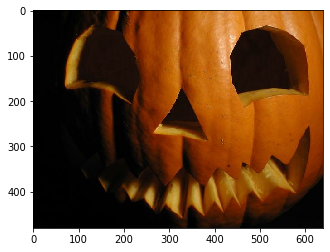

In [15]:
import matplotlib.pyplot as plt
plt.plot(image)

In [ ]:
    run_metadata_ptr)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/client/session.py", line 1183, in _run
    feed_dict_tensor, options, run_metadata)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/client/session.py", line 1361, in _do_run
    run_metadata)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/client/session.py", line 1386, in _do_call
    raise type(e)(node_def, op, message)
tensorflow.python.framework.errors_impl.InvalidArgumentError: Expected image (JPEG, PNG, or GIF), got unknown format starting with '\037\213\010\000\000\000\000\000\000\003\225WUP\034@'
         [[node DecodeJpeg_1 (defined at imagenet_to_gcs.py:264) ]]

Errors may have originated from an input operation.
Input Source operations connected to node DecodeJpeg_1:
 Placeholder_2 (defined at imagenet_to_gcs.py:263)

Original stack trace for 'DecodeJpeg_1':
  File "imagenet_to_gcs.py", line 519, in <module>
    app.run(main)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/absl/app.py", line 299, in run
    _run_main(main, args)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/absl/app.py", line 250, in _run_main
    sys.exit(main(argv))
  File "imagenet_to_gcs.py", line 511, in main
    training_records, validation_records = convert_to_tf_records(raw_data_dir)
  File "imagenet_to_gcs.py", line 437, in convert_to_tf_records
    TRAINING_DIRECTORY, TRAINING_SHARDS)
  File "imagenet_to_gcs.py", line 366, in _process_dataset
    coder = ImageCoder()
  File "imagenet_to_gcs.py", line 264, in __init__
    self._decode_jpeg = tf.image.decode_jpeg(self._decode_jpeg_data, channels=3)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/ops/gen_image_ops.py", line 1092, in decode_jpeg
    dct_method=dct_method, name=name)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/framework/op_def_library.py", line 742, in _apply_op_helper
    attrs=attr_protos, op_def=op_def)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 3322, in _create_op_internal
    op_def=op_def)
  File "/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 1756, in __init__
    self._traceback = tf_stack.extract_stack()